In [ ]:
print("hello")

In [1]:
import random
import pandas as pd
import numpy as np
import os

# 사이킷런에서 랜덤포레스트 모델 불러오기
from sklearn.ensemble import RandomForestRegressor

# 경고 메세지 무시하기
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록(그래프가 화면에 뜨지 않을 때)
%matplotlib inline

# 그래프(figure)에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정(나눔고딕체)
plt.rc('font', family='NanumGothic')

# 조용하 강사님이 올려주신 코드(한글화-matplotlib)
import koreanize_matplotlib

                                              0.0/7.9 MB ? eta -:--:--
                                              0.2/7.9 MB 9.0 MB/s eta 0:00:01
     --                                       0.4/7.9 MB 4.5 MB/s eta 0:00:02
     ---                                      0.6/7.9 MB 4.4 MB/s eta 0:00:02
     ----                                     0.9/7.9 MB 4.9 MB/s eta 0:00:02
     -----                                    1.0/7.9 MB 4.4 MB/s eta 0:00:02
     ------                                   1.2/7.9 MB 4.6 MB/s eta 0:00:02
     -------                                  1.4/7.9 MB 4.6 MB/s eta 0:00:02
     --------                                 1.6/7.9 MB 4.4 MB/s eta 0:00:02
     ---------                                1.8/7.9 MB 4.3 MB/s eta 0:00:02
     ---------                                2.0/7.9 MB 4.3 MB/s eta 0:00:02
     ----------                               2.1/7.9 MB 4.2 MB/s eta 0:00:02
     ----------                               2.1/7.9 MB 4.2 MB/s eta 0

In [79]:
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 30)

In [6]:
import sys
import sktime
import tqdm as tq
import xgboost as xgb
import matplotlib
import seaborn as sns
import sklearn as skl
import pandas as pd
import numpy as np
print("-------------------------- Python & library version --------------------------")
print("Python version: {}".format(sys.version))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(matplotlib.__version__))
print("tqdm version: {}".format(tq.__version__))
print("sktime version: {}".format(sktime.__version__))
print("xgboost version: {}".format(xgb.__version__))
print("seaborn version: {}".format(sns.__version__))
print("scikit-learn version: {}".format(skl.__version__))
print("------------------------------------------------------------------------------")

-------------------------- Python & library version --------------------------
Python version: 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
numpy version: 1.24.3
matplotlib version: 3.7.1
tqdm version: 4.65.0
sktime version: 0.24.0
xgboost version: 2.0.0
seaborn version: 0.12.2
scikit-learn version: 1.2.2
------------------------------------------------------------------------------


In [7]:
# 시드 고정
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

### Load File

In [82]:
train = pd.read_csv('train.csv',encoding='cp949')
test = pd.read_csv('test.csv',encoding='cp949')

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
 7   비전기냉방설비운영     2296 non-null   float64
 8   태양광보유         1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


In [85]:
train.describe()

num     전력사용량(kWh)         기온(°C)        풍속(m/s)  \
count  122400.000000  122400.000000  122400.000000  122400.000000   
mean       30.500000    2324.830866      24.251713       2.151641   
std        17.318173    2058.999326       3.407902       1.514475   
min         1.000000       0.000000      11.100000       0.000000   
25%        15.750000    1055.268000      21.800000       1.100000   
50%        30.500000    1700.352000      24.200000       1.900000   
75%        45.250000    2780.487000      26.500000       2.900000   
max        60.000000   17739.225000      36.300000      20.100000   

               습도(%)        강수량(mm)         일조(hr)      비전기냉방설비운영  \
count  122400.000000  122400.000000  122400.000000  122400.000000   
mean       80.169848       0.514989       0.213533       0.683333   
std        15.525862       2.624505       0.370517       0.465178   
min        19.000000       0.000000       0.000000       0.000000   
25%        70.000000       0.000000       0.000000       0.000000   
50%        84.000000       0.000000       0.000000       1.000000   
75%        93.000000       0.000000       0.300000       1.000000   
max       100.000000      81.500000       1.000000       1.000000   

               태양광보유  
count  122400.000000  
mean        0.483333  
std         0.499724  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [86]:
# 변수들을 영문명으로 변경
cols = ['num', 'date_time', 'power', 'temp', 'wind','hum' ,'prec', 'sun', 'non_elec', 'solar']
train.columns = cols

In [87]:
# 시간 관련 변수들 생성
date = pd.to_datetime(train.date_time)
train['hour'] = date.dt.hour
train['day'] = date.dt.weekday
train['month'] = date.dt.month
train['week'] = date.dt.weekofyear
 
### 공휴일 변수 추가
train['holiday'] = train.apply(lambda x : 0 if x['day']<5 else 1, axis = 1)
train.loc[('2020-08-17'<=train.date_time)&(train.date_time<'2020-08-18'), 'holiday'] = 1
 
## cyclical encoding
train['sin_time'] = np.sin(2*np.pi*train.hour/24)
train['cos_time'] = np.cos(2*np.pi*train.hour/24)

In [142]:
num_31=train[train['num']==31]

In [143]:
min=num_31['power'].min()
min

2285.28

In [144]:
num_31[(num_31['power']==min)]

num      date_time    power  temp  wind   hum  prec  sun  non_elec  \
61457   31  2020-06-11 17  2285.28  31.4   3.2  44.0   0.0  1.0       1.0   

       solar  hour  day  month  week  holiday  sin_time  cos_time  
61457    0.0    17    3      6    24        0 -0.965926 -0.258819

In [147]:
train[(train['num']==31)&(train['date_time'].str.contains('2020-06-11'))]

num      date_time     power  temp  wind   hum  prec  sun  non_elec  \
61440   31  2020-06-11 00  5868.720  22.5   0.9  89.0   0.2  0.0       1.0   
61441   31  2020-06-11 01  5886.000  22.4   2.0  91.0   0.0  0.0       1.0   
61442   31  2020-06-11 02  5871.312  22.1   1.5  90.0   0.0  0.0       1.0   
61443   31  2020-06-11 03  5859.648  22.2   1.4  90.0   0.0  0.0       1.0   
61444   31  2020-06-11 04  5846.256  22.1   1.1  90.0   0.0  0.0       1.0   
61445   31  2020-06-11 05  5832.432  21.8   1.3  89.0   0.0  0.0       1.0   
61446   31  2020-06-11 06  5873.472  21.9   1.5  88.0   0.0  0.0       1.0   
61447   31  2020-06-11 07  5938.704  22.4   2.0  87.0   0.0  0.0       1.0   
61448   31  2020-06-11 08  6048.864  23.2   1.2  83.0   0.0  0.0       1.0   
61449   31  2020-06-11 09  6165.504  24.2   1.1  80.0   0.0  0.0       1.0   
61450   31  2020-06-11 10  6200.064  25.9   1.0  72.0   0.0  0.4       1.0   
61451   31  2020-06-11 11  6249.312  27.2   2.5  66.0   0.0  0.6       1.0   
61452   31  2020-06-11 12  6292.944  28.2   3.5  61.0   0.0  0.9       1.0   
61453   31  2020-06-11 13  6372.000  29.2   2.5  57.0   0.0  1.0       1.0   
61454   31  2020-06-11 14  6417.792  30.2   3.0  52.0   0.0  1.0       1.0   
61455   31  2020-06-11 15  6424.272  31.2   2.7  44.0   0.0  1.0       1.0   
61456   31  2020-06-11 16  6200.064  31.3   3.6  44.0   0.0  1.0       1.0   
61457   31  2020-06-11 17  2285.280  31.4   3.2  44.0   0.0  1.0       1.0   
61458   31  2020-06-11 18  5810.400  30.5   3.2  45.0   0.0  1.0       1.0   
61459   31  2020-06-11 19  6147.792  29.1   2.3  49.0   0.0  0.1       1.0   
61460   31  2020-06-11 20  5992.272  27.7   3.7  63.0   0.0  0.0       1.0   
61461   31  2020-06-11 21  5939.568  26.0   4.2  65.0   0.0  0.0       1.0   
61462   31  2020-06-11 22  5930.928  25.1   2.8  70.0   0.0  0.0       1.0   
61463   31  2020-06-11 23  5897.232  24.6   1.6  72.0   0.0  0.0       1.0   

       solar  hour  day  month  week  holiday      sin_time      cos_time  
61440    0.0     0    3      6    24        0  0.000000e+00  1.000000e+00  
61441    0.0     1    3      6    24        0  2.588190e-01  9.659258e-01  
61442    0.0     2    3      6    24        0  5.000000e-01  8.660254e-01  
61443    0.0     3    3      6    24        0  7.071068e-01  7.071068e-01  
61444    0.0     4    3      6    24        0  8.660254e-01  5.000000e-01  
61445    0.0     5    3      6    24        0  9.659258e-01  2.588190e-01  
61446    0.0     6    3      6    24        0  1.000000e+00  6.123234e-17  
61447    0.0     7    3      6    24        0  9.659258e-01 -2.588190e-01  
61448    0.0     8    3      6    24        0  8.660254e-01 -5.000000e-01  
61449    0.0     9    3      6    24        0  7.071068e-01 -7.071068e-01  
61450    0.0    10    3      6    24        0  5.000000e-01 -8.660254e-01  
61451    0.0    11    3      6    24        0  2.588190e-01 -9.659258e-01  
61452    0.0    12    3      6    24        0  1.224647e-16 -1.000000e+00  
61453    0.0    13    3      6    24        0 -2.588190e-01 -9.659258e-01  
61454    0.0    14    3      6    24        0 -5.000000e-01 -8.660254e-01  
61455    0.0    15    3      6    24        0 -7.071068e-01 -7.071068e-01  
61456    0.0    16    3      6    24        0 -8.660254e-01 -5.000000e-01  
61457    0.0    17    3      6    24        0 -9.659258e-01 -2.588190e-01  
61458    0.0    18    3      6    24        0 -1.000000e+00 -1.836970e-16  
61459    0.0    19    3      6    24        0 -9.659258e-01  2.588190e-01  
61460    0.0    20    3      6    24        0 -8.660254e-01  5.000000e-01  
61461    0.0    21    3      6    24        0 -7.071068e-01  7.071068e-01  
61462    0.0    22    3      6    24        0 -5.000000e-01  8.660254e-01  
61463    0.0    23    3      6    24        0 -2.588190e-01  9.659258e-01

In [ ]:
train[()]

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(-250.0, 0, '2020-08-14 14'),
  Text(0.0, 0, '2020-06-01 00'),
  Text(250.0, 0, '2020-06-11 10'),
  Text(500.0, 0, '2020-06-21 20'),
  Text(750.0, 0, '2020-07-02 06'),
  Text(1000.0, 0, '2020-07-12 16'),
  Text(1250.0, 0, '2020-07-23 02'),
  Text(1500.0, 0, '2020-08-02 12'),
  Text(1750.0, 0, '2020-08-12 22'),
  Text(2000.0, 0, '2020-08-23 08'),
  Text(2250.0, 0, '')])

<Figure size 1500x600 with 0 Axes>

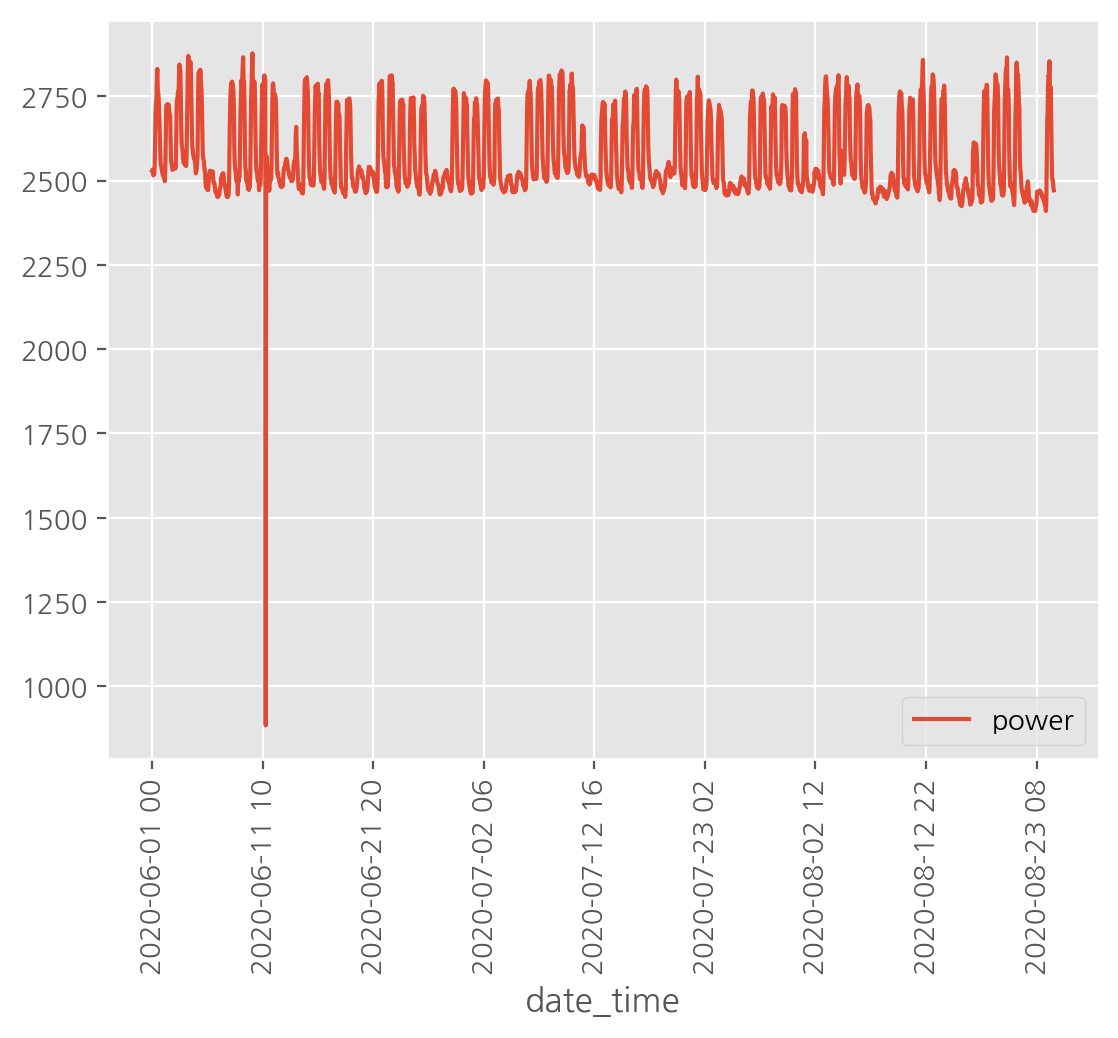

In [145]:
# 공장별 변화
plt.figure(figsize=(15,6))
train[train['num']==33].plot('date_time','power')
plt.xticks(rotation=90)

In [134]:
train[train['num']==33]

num      date_time     power  temp  wind   hum  prec  sun  non_elec  \
65280   33  2020-06-01 00  2529.360  19.9   1.4  83.0   0.0  0.0       1.0   
65281   33  2020-06-01 01  2532.384  19.3   0.9  89.0   0.0  0.0       1.0   
65282   33  2020-06-01 02  2527.416  18.5   0.7  94.0   0.2  0.0       1.0   
65283   33  2020-06-01 03  2515.536  18.5   0.3  96.0   0.4  0.0       1.0   
65284   33  2020-06-01 04  2519.424  18.6   1.5  95.0   0.0  0.0       1.0   
...    ...            ...       ...   ...   ...   ...   ...  ...       ...   
67315   33  2020-08-24 19  2511.864  31.1   1.1  67.0   0.0  0.6       1.0   
67316   33  2020-08-24 20  2499.768  29.3   0.7  80.0   0.0  0.0       1.0   
67317   33  2020-08-24 21  2499.552  28.6   0.9  84.0   0.0  0.0       1.0   
67318   33  2020-08-24 22  2478.600  28.3   1.3  88.0   0.0  0.0       1.0   
67319   33  2020-08-24 23  2471.256  27.8   0.7  88.0   0.0  0.0       1.0   

       solar  hour  day  month  week  holiday  sin_time  cos_time  
65280    0.0     0    0      6    23        0  0.000000  1.000000  
65281    0.0     1    0      6    23        0  0.258819  0.965926  
65282    0.0     2    0      6    23        0  0.500000  0.866025  
65283    0.0     3    0      6    23        0  0.707107  0.707107  
65284    0.0     4    0      6    23        0  0.866025  0.500000  
...      ...   ...  ...    ...   ...      ...       ...       ...  
67315    0.0    19    0      8    35        0 -0.965926  0.258819  
67316    0.0    20    0      8    35        0 -0.866025  0.500000  
67317    0.0    21    0      8    35        0 -0.707107  0.707107  
67318    0.0    22    0      8    35        0 -0.500000  0.866025  
67319    0.0    23    0      8    35        0 -0.258819  0.965926  

[2040 rows x 17 columns]

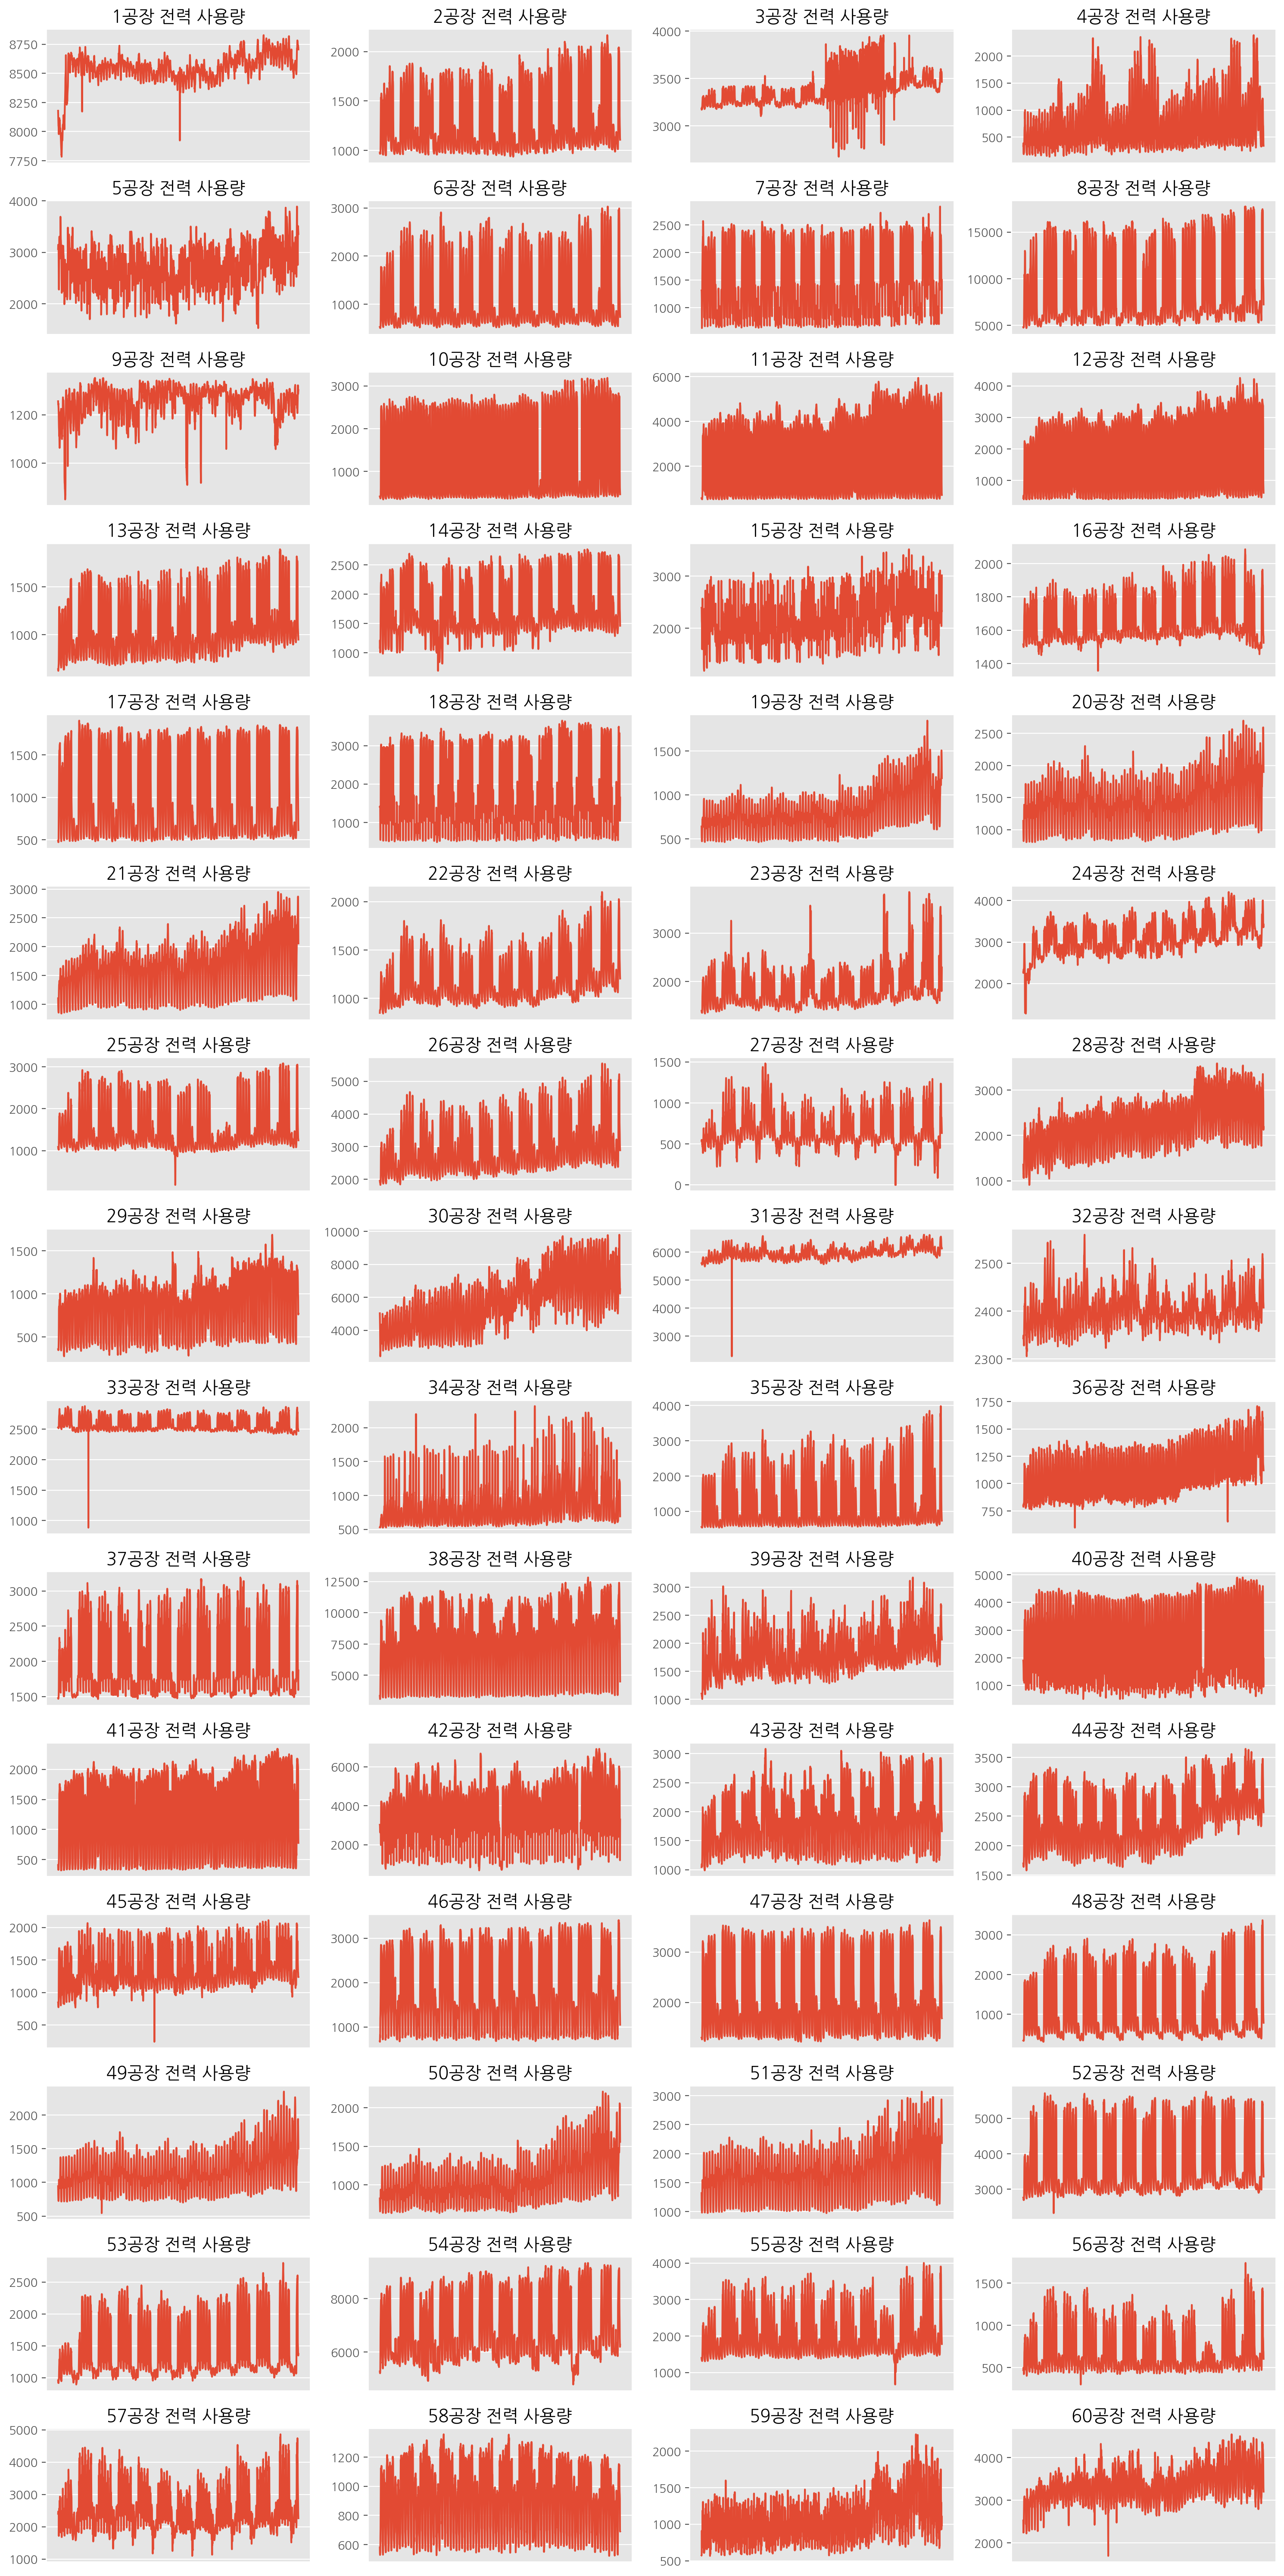

In [132]:
import matplotlib.pyplot as plt

# Create a figure with 4 columns
fig, axes = plt.subplots(nrows=15, ncols=4, figsize=(15, 30))

for i in range(1, 61):
    # Calculate row and column for the current subplot
    row = (i - 1) // 4
    col = (i - 1) % 4

    # Select the current subplot's axis
    ax = axes[row, col]

    # Filter data for the current factory (assuming the data is in a DataFrame named 'train')
    factory_data = train[train['num'] == i]

    # Plot the data
    ax.plot(factory_data['date_time'], factory_data['power'])
    ax.set_xticks([])
    #ax.set_xticklabels(factory_data['date_time'], rotation=90)
    ax.set_title(f'{i}공장 전력 사용량')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
plt.figure(figsize=(15,6))
for i in range(1,61):
    train[train['num']==i].plot('date_time','power')
    plt.xticks(rotation=90)
    plt.title(f'{i}공장 전력 사용량')
    
plt.show()

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(-250.0, 0, '2020-08-14 14'),
  Text(0.0, 0, '2020-06-01 00'),
  Text(250.0, 0, '2020-06-11 10'),
  Text(500.0, 0, '2020-06-21 20'),
  Text(750.0, 0, '2020-07-02 06'),
  Text(1000.0, 0, '2020-07-12 16'),
  Text(1250.0, 0, '2020-07-23 02'),
  Text(1500.0, 0, '2020-08-02 12'),
  Text(1750.0, 0, '2020-08-12 22'),
  Text(2000.0, 0, '2020-08-23 08'),
  Text(2250.0, 0, '')])

<Figure size 1500x600 with 0 Axes>

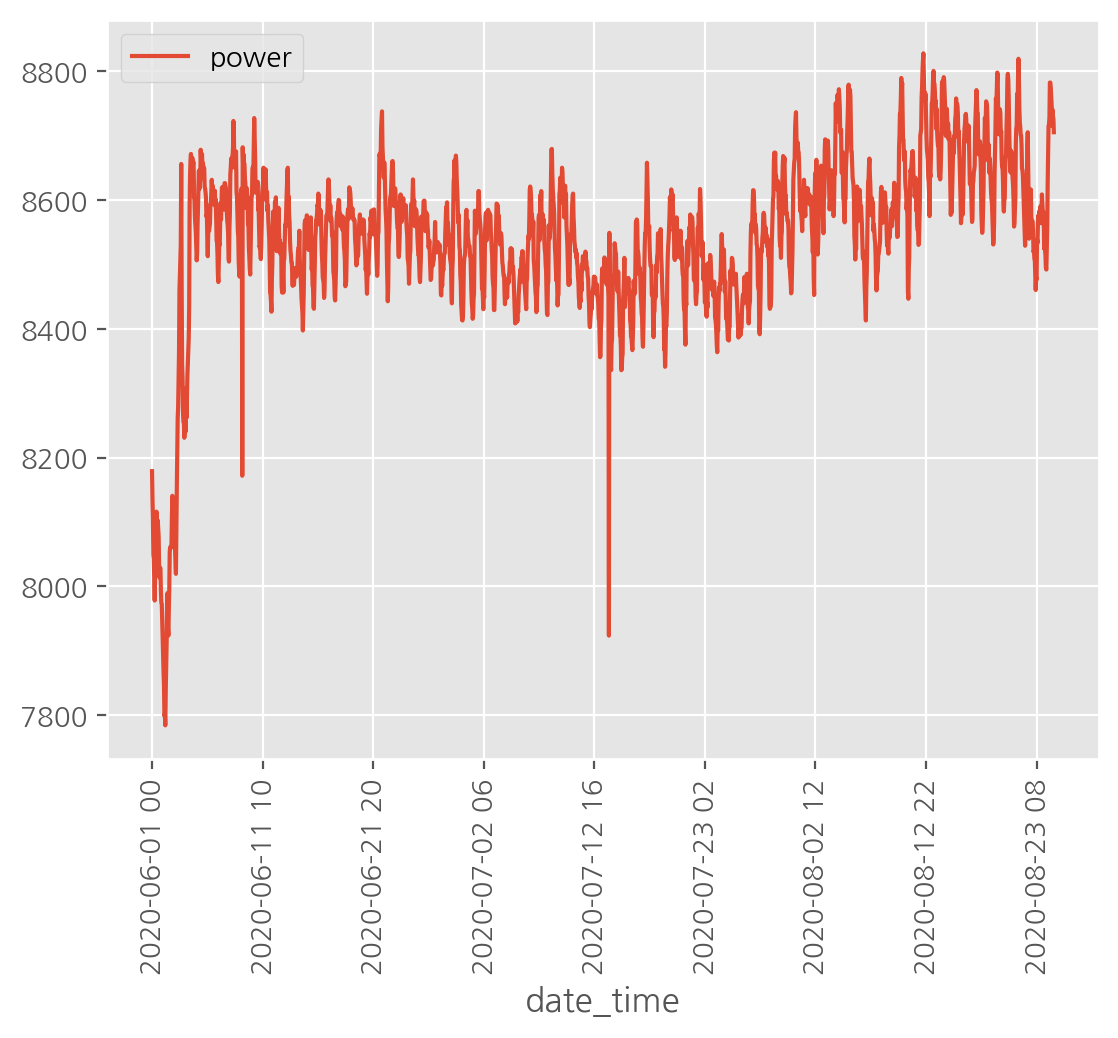

In [128]:
# 공장별 변화
plt.figure(figsize=(15,6))
train[train['num']==1].plot('date_time','power')
plt.xticks(rotation=90)

In [94]:
# 월별 
month=train[train['num']==1].groupby('month')['power'].agg({'sum','mean','min','max'}).reset_index()
month

month          sum       max         mean       min
0      6  6126308.640  8737.632  8508.762000  7784.424
1      7  6326572.392  8736.336  8503.457516  7923.744
2      8  4975396.884  8827.704  8637.841812  8412.984

Text(0.5, 1.0, '월별 전력 사용량(누적)')

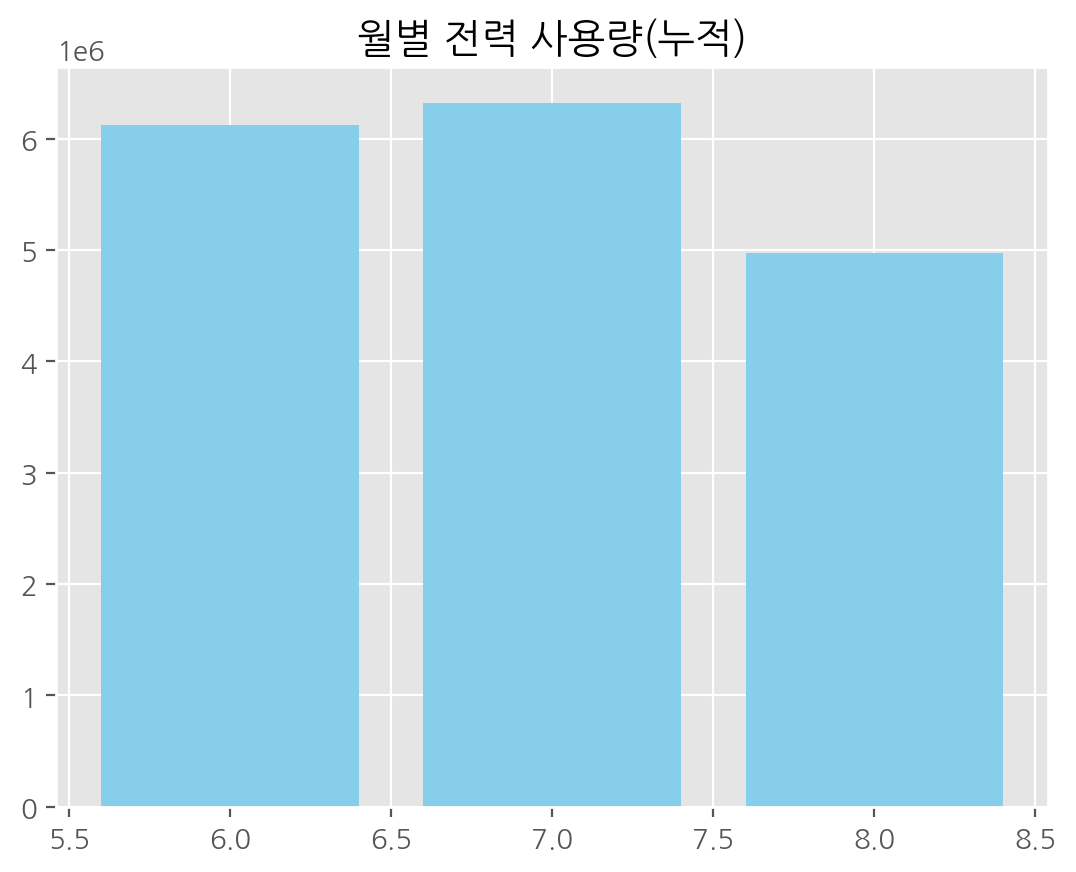

In [106]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.bar(month['month'],month['sum'],color='skyblue')
plt.title('월별 전력 사용량(누적)')

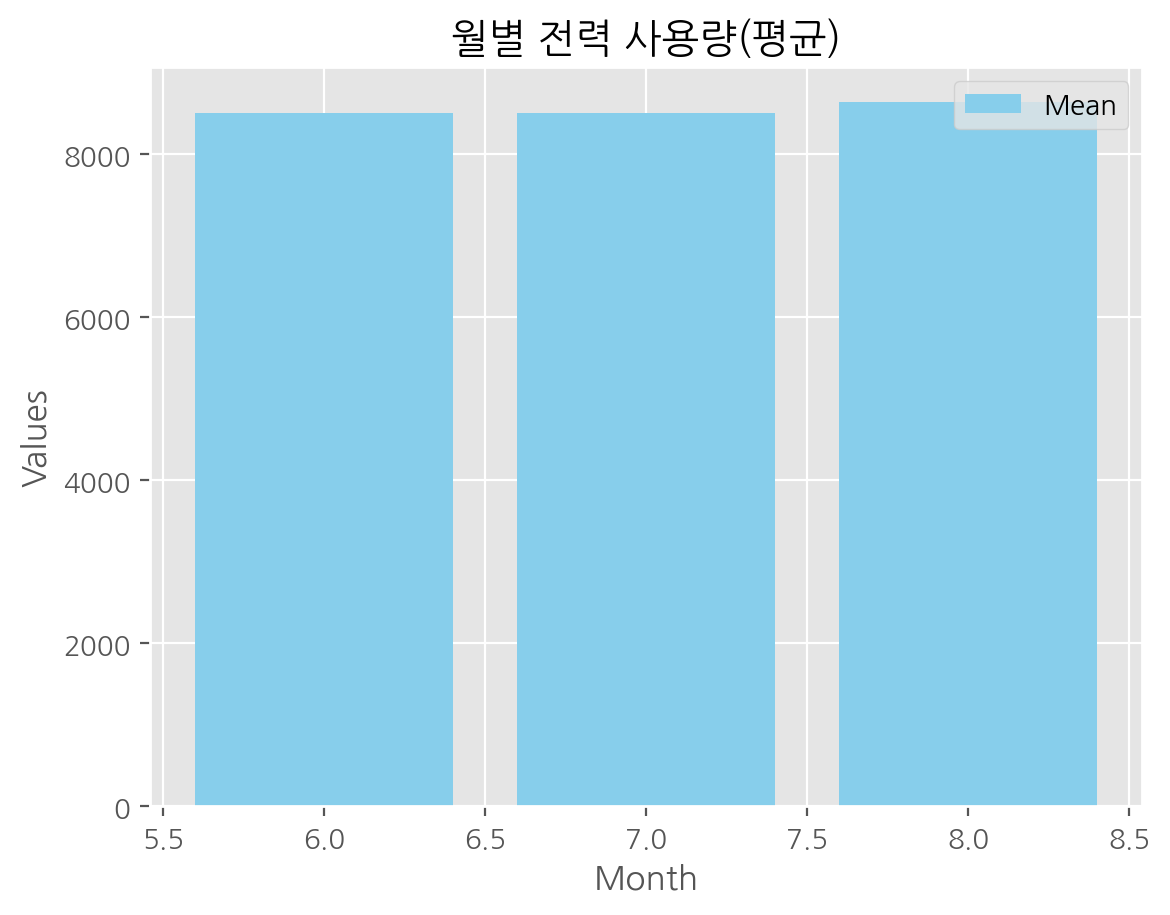

In [119]:
plt.style.use('ggplot')
plt.bar(month['month'], month['mean'], color='skyblue', label='Mean')


plt.xlabel('Month')
plt.ylabel('Values')
plt.title('월별 전력 사용량(평균)')
plt.legend()

plt.show()

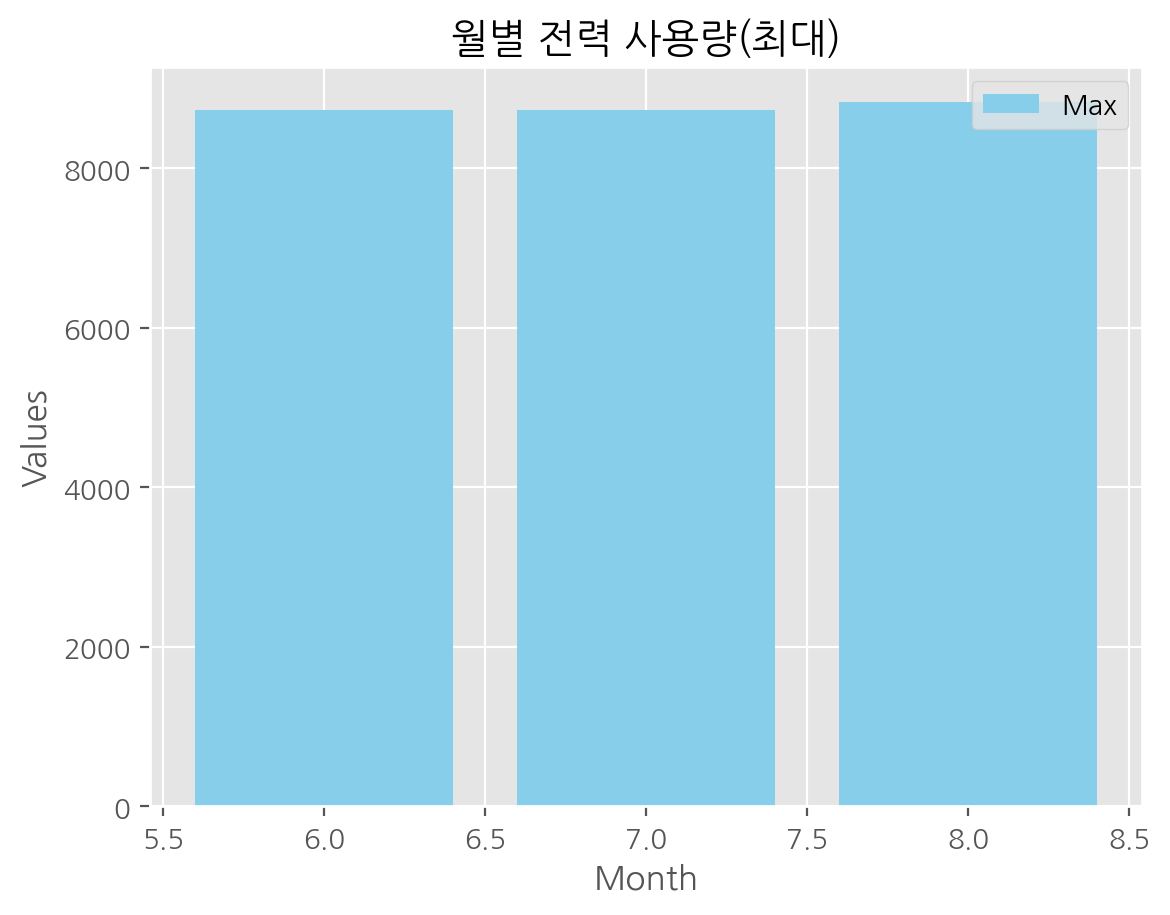

In [122]:
plt.style.use('ggplot')
plt.bar(month['month'], month['max'], color='skyblue', label='Max')


plt.xlabel('Month')
plt.ylabel('Values')
plt.title('월별 전력 사용량(최대)')
plt.legend()

plt.show()

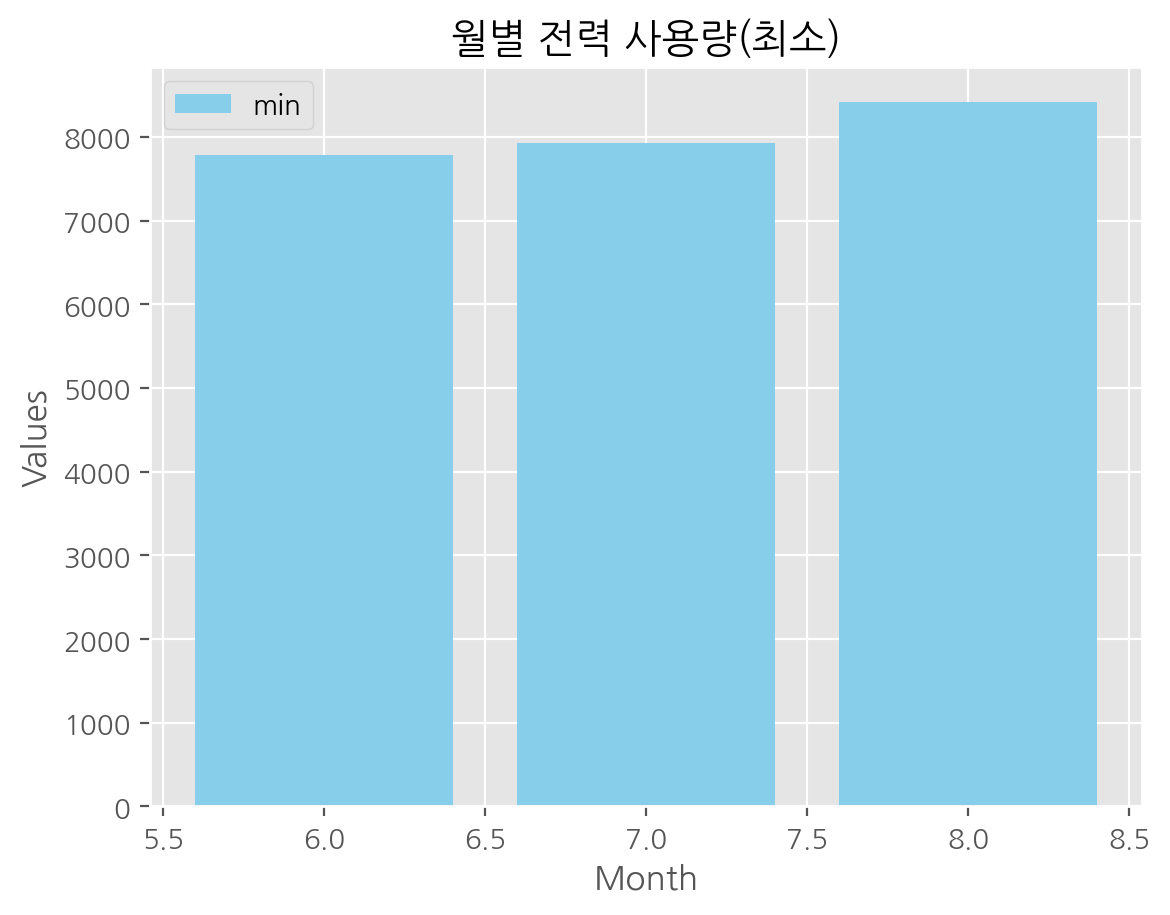

In [123]:
plt.style.use('ggplot')
plt.bar(month['month'], month['min'], color='skyblue', label='min')


plt.xlabel('Month')
plt.ylabel('Values')
plt.title('월별 전력 사용량(최소)')
plt.legend()

plt.show()

In [66]:
train

num      date_time     power  temp  wind   hum  prec  sun  non_elec  \
0         1  2020-06-01 00  8179.056  17.6   2.5  92.0   0.8  0.0       0.0   
1         1  2020-06-01 01  8135.640  17.7   2.9  91.0   0.3  0.0       0.0   
2         1  2020-06-01 02  8107.128  17.5   3.2  91.0   0.0  0.0       0.0   
3         1  2020-06-01 03  8048.808  17.1   3.2  91.0   0.0  0.0       0.0   
4         1  2020-06-01 04  8043.624  17.0   3.3  92.0   0.0  0.0       0.0   
...     ...            ...       ...   ...   ...   ...   ...  ...       ...   
122395   60  2020-08-24 19  4114.368  27.8   2.3  68.0   0.0  0.7       1.0   
122396   60  2020-08-24 20  3975.696  27.3   1.2  71.0   0.0  0.0       1.0   
122397   60  2020-08-24 21  3572.208  27.3   1.8  71.0   0.0  0.0       1.0   
122398   60  2020-08-24 22  3299.184  27.1   1.8  74.0   0.0  0.0       1.0   
122399   60  2020-08-24 23  3204.576  27.1   2.6  75.0   0.0  0.0       1.0   

        solar  hour  day  month  week  holiday  sin_time  cos_time  
0         0.0     0    0      6    23        0  0.000000  1.000000  
1         0.0     1    0      6    23        0  0.258819  0.965926  
2         0.0     2    0      6    23        0  0.500000  0.866025  
3         0.0     3    0      6    23        0  0.707107  0.707107  
4         0.0     4    0      6    23        0  0.866025  0.500000  
...       ...   ...  ...    ...   ...      ...       ...       ...  
122395    1.0    19    0      8    35        0 -0.965926  0.258819  
122396    1.0    20    0      8    35        0 -0.866025  0.500000  
122397    1.0    21    0      8    35        0 -0.707107  0.707107  
122398    1.0    22    0      8    35        0 -0.500000  0.866025  
122399    1.0    23    0      8    35        0 -0.258819  0.965926  

[122400 rows x 17 columns]

In [67]:
train['day'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [ ]:
모르겠어

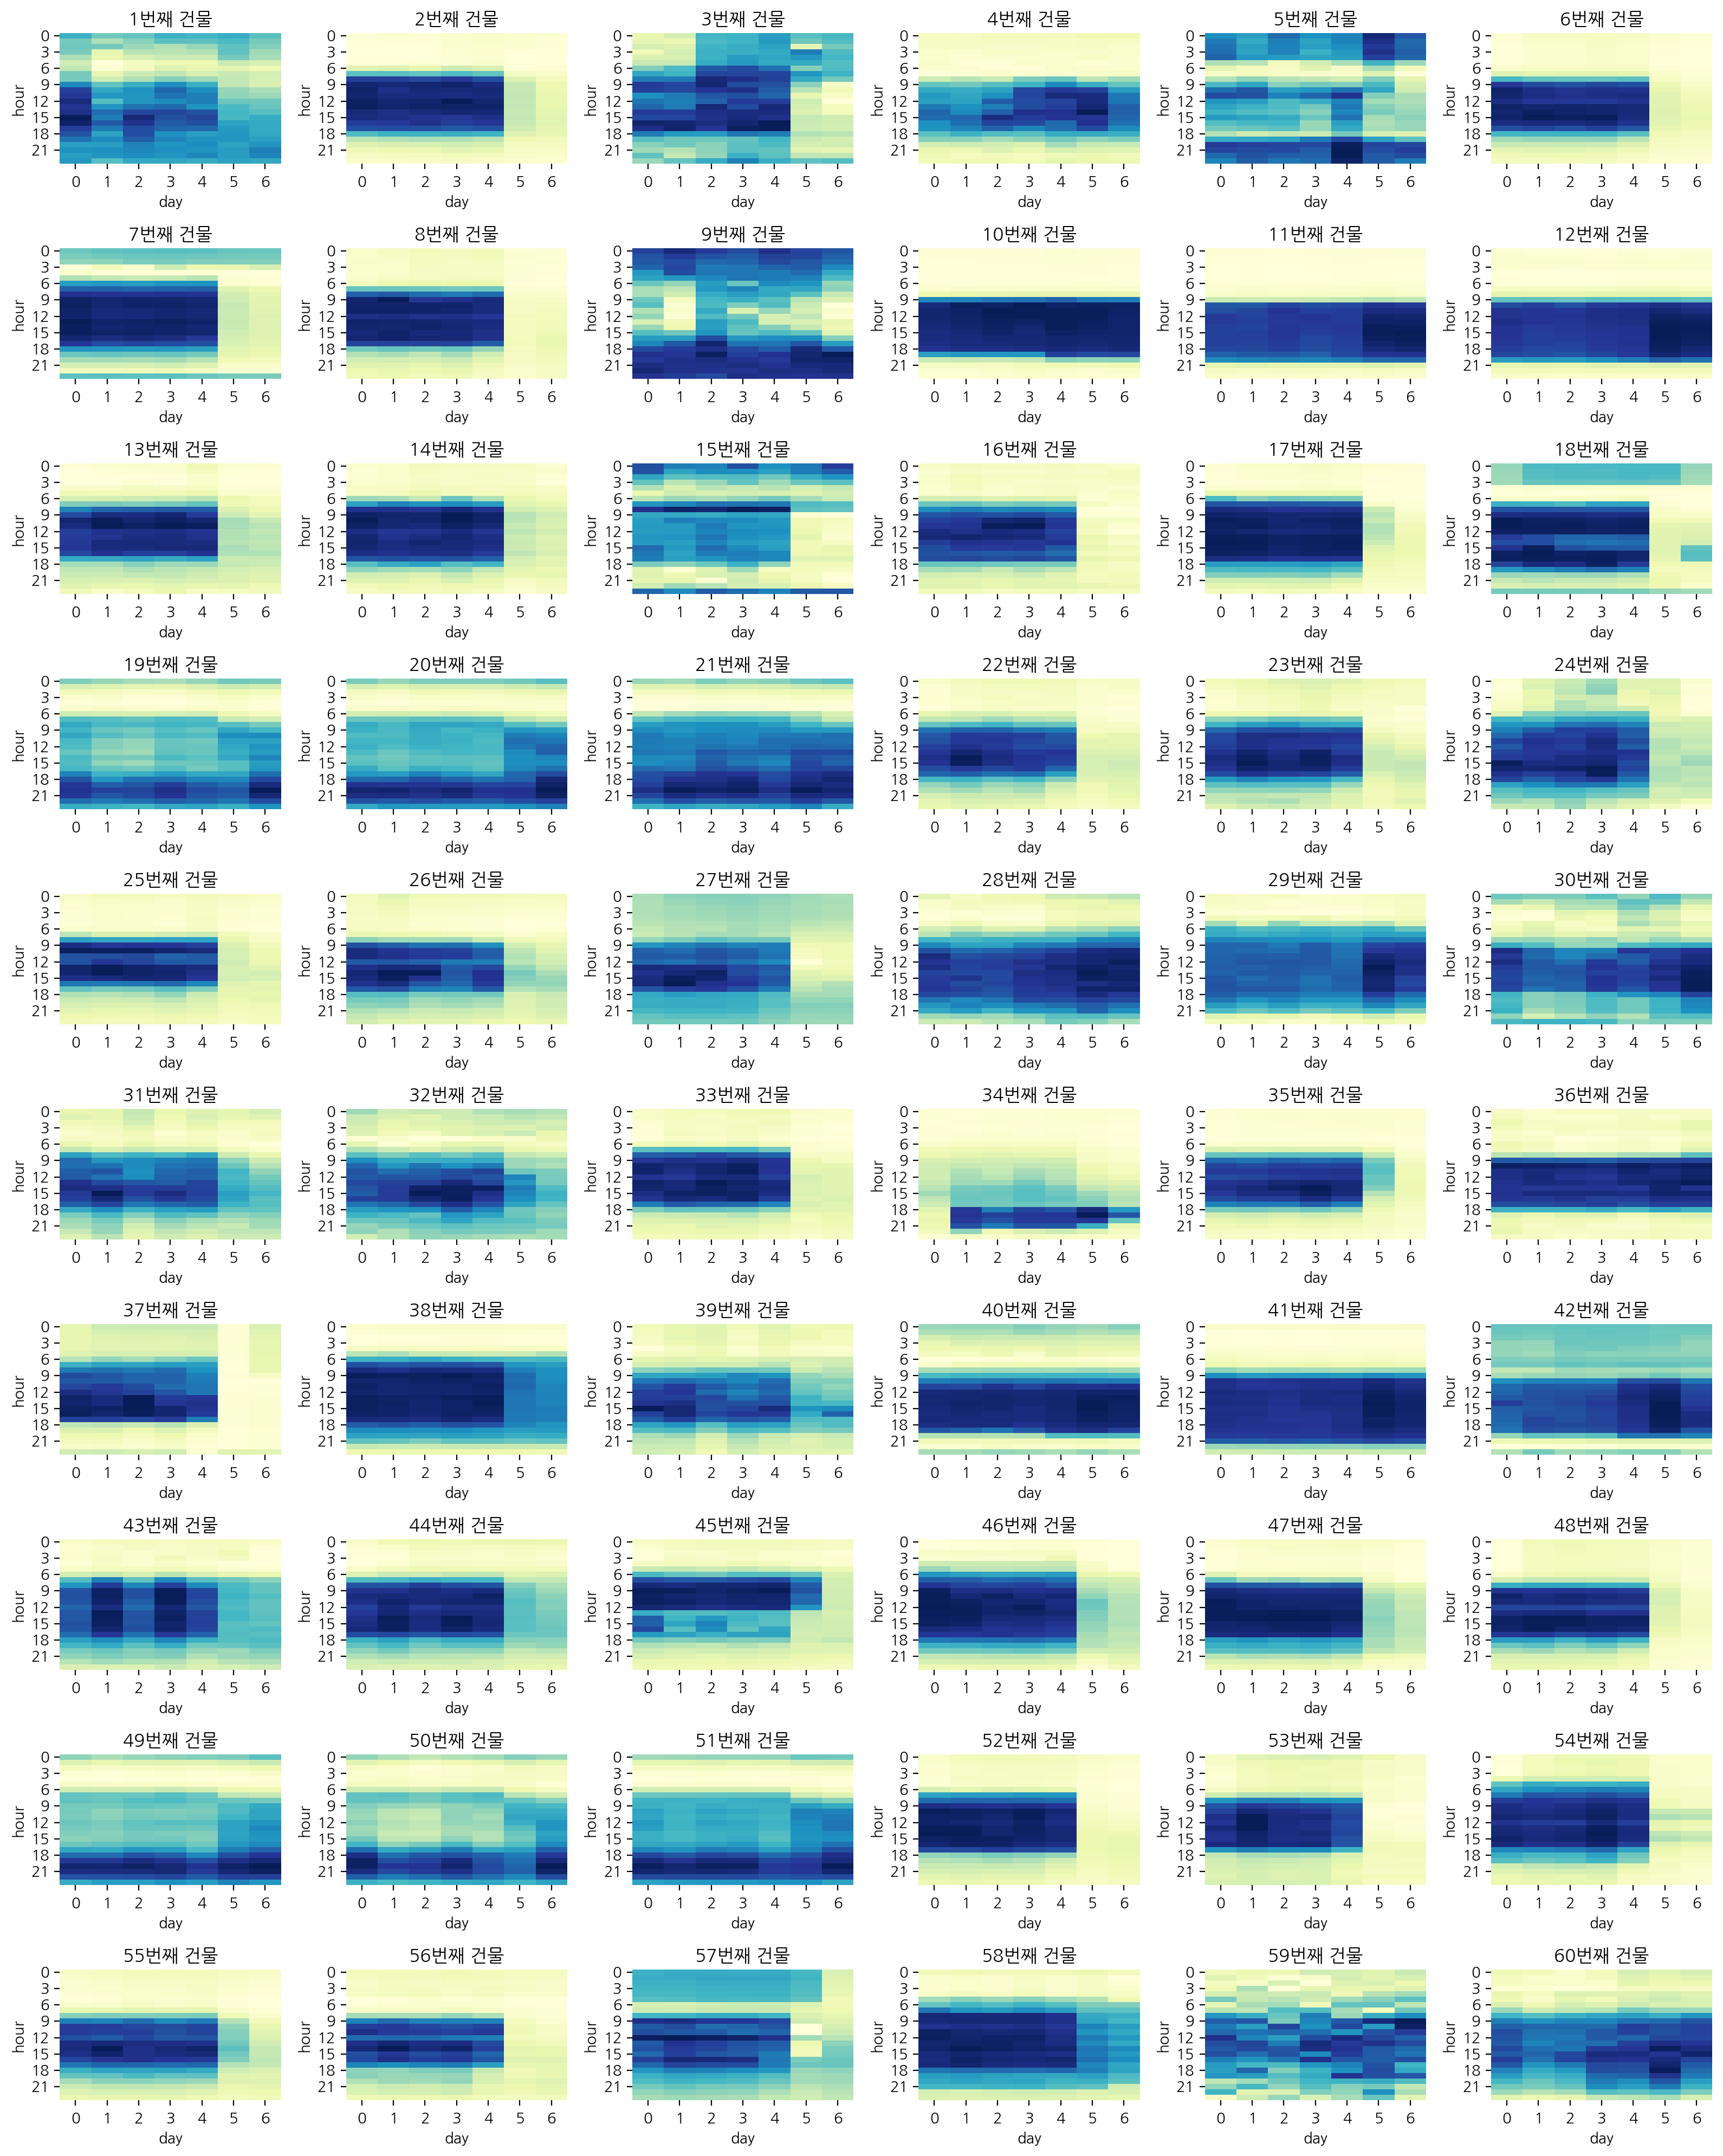

In [18]:
# 필요한 라이브러리 및 설정
import matplotlib.pyplot as plt
import seaborn as sns

# 각 건물별 요일, 시간대 전력 사용량 시각화
num_buildings = 60  # 총 건물 수
rows, cols = 10, 6  # 10x6 그리드 (60개의 그래프를 4개씩 표시)

fig, axes = plt.subplots(rows, cols, figsize=(16, 20))  # 서브플롯 생성

for i in range(1, num_buildings + 1):
    row = (i - 1) // cols  # 행
    col = (i - 1) % cols  # 열
    
    p = train[train['num'] == i].groupby(['hour', 'day'])['power'].median().reset_index()
    p['M'] = p['power']  # median(전력사용량) 값을 'M' 열로 저장
    
    p = p.pivot('hour', 'day', 'M')
    
    sns.heatmap(p, cmap='YlGnBu', annot=False,  cbar=False, ax=axes[row, col])
    axes[row, col].set_title(str(i) + '번째 건물')

# 비어있는 서브플롯 숨기기
for i in range(num_buildings, rows * cols):
    row = i // cols
    col = i % cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [68]:
from sklearn.cluster import KMeans

# KMeans 객체 생성 및 클러스터링 수행
kmeans = KMeans(n_clusters=5)
kmeans.fit(train[['power','day','num','holiday','sin_time']])

# 클러스터링 결과 확인
train['cluster_label'] = kmeans.labels_
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['power', 'day','num','holiday','sin_time'])

print("중심점:")
print(cluster_centers)
print("\n각 데이터의 소속 클러스터 레이블:")
train

중심점:
          power       day        num       holiday  sin_time
0   5563.040764  3.093746  33.572883  3.296393e-01 -0.101670
1   1141.191916  3.088600  30.490648  3.309501e-01  0.067326
2  14517.525697  2.030488  12.481707 -1.110223e-15 -0.123260
3   2751.986200  2.748532  31.191799  2.300123e-01 -0.086810
4   8717.186624  2.769214  21.654358  2.423787e-01 -0.086424

각 데이터의 소속 클러스터 레이블:


num      date_time     power  temp  wind   hum  prec  sun  non_elec  \
0         1  2020-06-01 00  8179.056  17.6   2.5  92.0   0.8  0.0       0.0   
1         1  2020-06-01 01  8135.640  17.7   2.9  91.0   0.3  0.0       0.0   
2         1  2020-06-01 02  8107.128  17.5   3.2  91.0   0.0  0.0       0.0   
3         1  2020-06-01 03  8048.808  17.1   3.2  91.0   0.0  0.0       0.0   
4         1  2020-06-01 04  8043.624  17.0   3.3  92.0   0.0  0.0       0.0   
...     ...            ...       ...   ...   ...   ...   ...  ...       ...   
122395   60  2020-08-24 19  4114.368  27.8   2.3  68.0   0.0  0.7       1.0   
122396   60  2020-08-24 20  3975.696  27.3   1.2  71.0   0.0  0.0       1.0   
122397   60  2020-08-24 21  3572.208  27.3   1.8  71.0   0.0  0.0       1.0   
122398   60  2020-08-24 22  3299.184  27.1   1.8  74.0   0.0  0.0       1.0   
122399   60  2020-08-24 23  3204.576  27.1   2.6  75.0   0.0  0.0       1.0   

        solar  hour  day  month  week  holiday  sin_time  cos_time  \
0         0.0     0    0      6    23        0  0.000000  1.000000   
1         0.0     1    0      6    23        0  0.258819  0.965926   
2         0.0     2    0      6    23        0  0.500000  0.866025   
3         0.0     3    0      6    23        0  0.707107  0.707107   
4         0.0     4    0      6    23        0  0.866025  0.500000   
...       ...   ...  ...    ...   ...      ...       ...       ...   
122395    1.0    19    0      8    35        0 -0.965926  0.258819   
122396    1.0    20    0      8    35        0 -0.866025  0.500000   
122397    1.0    21    0      8    35        0 -0.707107  0.707107   
122398    1.0    22    0      8    35        0 -0.500000  0.866025   
122399    1.0    23    0      8    35        0 -0.258819  0.965926   

        cluster_label  
0                   4  
1                   4  
2                   4  
3                   4  
4                   4  
...               ...  
122395              3  
122396              3  
122397              3  
122398              3  
122399              3  

[122400 rows x 18 columns]

In [69]:
train[train['date_time']=='2020-06-01 00']

num      date_time     power  temp  wind    hum  prec  sun  non_elec  \
0         1  2020-06-01 00  8179.056  17.6   2.5   92.0   0.8  0.0       0.0   
2040      2  2020-06-01 00   977.184  18.3   2.5   94.0   0.0  0.0       1.0   
4080      3  2020-06-01 00  3183.624  17.0   2.0  100.0   1.1  0.0       1.0   
6120      4  2020-06-01 00   339.552  22.6   0.7   62.0   0.0  0.0       1.0   
8160      5  2020-06-01 00  3063.744  18.3   2.5   94.0   0.0  0.0       1.0   
10200     6  2020-06-01 00   527.580  17.0   2.0  100.0   1.1  0.0       0.0   
12240     7  2020-06-01 00  1313.658  17.6   2.5   92.0   0.8  0.0       1.0   
14280     8  2020-06-01 00  4801.977  19.1   1.1   73.0   0.0  0.0       1.0   
16320     9  2020-06-01 00  1255.932  20.3   1.1   74.0   0.0  0.0       0.0   
18360    10  2020-06-01 00   417.960  18.3   2.5   94.0   0.0  0.0       1.0   
20400    11  2020-06-01 00   581.040  18.3   2.5   94.0   0.0  0.0       0.0   
22440    12  2020-06-01 00   441.072  17.1   2.6   94.0   0.1  0.0       1.0   
24480    13  2020-06-01 00   640.872  19.0   0.7   80.0   0.0  0.0       1.0   
26520    14  2020-06-01 00  1084.536  18.6   0.7   94.0   0.0  0.0       1.0   
28560    15  2020-06-01 00  2392.254  17.0   2.0  100.0   1.1  0.0       1.0   
30600    16  2020-06-01 00  1514.700  18.9   0.5   89.0   0.0  0.0       1.0   
32640    17  2020-06-01 00   490.590  17.6   2.5   92.0   0.8  0.0       1.0   
34680    18  2020-06-01 00  1408.941  17.0   2.0  100.0   1.1  0.0       0.0   
36720    19  2020-06-01 00   640.062  18.3   2.5   94.0   0.0  0.0       0.0   
38760    20  2020-06-01 00  1136.484  17.6   2.5   92.0   0.8  0.0       0.0   
40800    21  2020-06-01 00  1103.544  17.6   2.5   92.0   0.8  0.0       0.0   
42840    22  2020-06-01 00   850.176  19.9   1.4   83.0   0.0  0.0       1.0   
44880    23  2020-06-01 00  1395.495  19.9   1.4   83.0   0.0  0.0       0.0   
46920    24  2020-06-01 00  2268.864  17.0   2.0  100.0   1.1  0.0       1.0   
48960    25  2020-06-01 00  1087.344  17.0   2.0  100.0   1.1  0.0       1.0   
51000    26  2020-06-01 00  1952.424  19.4   0.8   81.0   0.0  0.0       0.0   
53040    27  2020-06-01 00   537.300  20.2   2.0   64.0   0.0  0.0       1.0   
55080    28  2020-06-01 00  1355.508  18.3   2.5   94.0   0.0  0.0       1.0   
57120    29  2020-06-01 00   357.210  19.1   1.7   94.0   0.0  0.0       0.0   
59160    30  2020-06-01 00  5032.908  19.3   2.2   99.0   0.0  0.0       1.0   
61200    31  2020-06-01 00  5606.064  17.6   2.5   92.0   0.8  0.0       1.0   
63240    32  2020-06-01 00  2343.384  17.0   2.0  100.0   1.1  0.0       0.0   
65280    33  2020-06-01 00  2529.360  19.9   1.4   83.0   0.0  0.0       1.0   
67320    34  2020-06-01 00   530.388  17.6   2.5   92.0   0.8  0.0       1.0   
69360    35  2020-06-01 00   553.824  17.1   2.6   94.0   0.1  0.0       1.0   
71400    36  2020-06-01 00   797.472  18.5   1.3   95.0   0.0  0.0       0.0   
73440    37  2020-06-01 00  1476.720  19.9   1.9   60.0   0.0  0.0       1.0   
75480    38  2020-06-01 00  3356.640  17.6   2.5   92.0   0.8  0.0       1.0   
77520    39  2020-06-01 00  1103.706  18.9   1.3   84.0   0.0  0.0       1.0   
79560    40  2020-06-01 00  1897.983  19.9   1.4   83.0   0.0  0.0       1.0   
81600    41  2020-06-01 00   411.966  17.0   2.0  100.0   1.1  0.0       1.0   
83640    42  2020-06-01 00  3024.000  17.1   2.6   94.0   0.1  0.0       1.0   
85680    43  2020-06-01 00  1044.360  20.7   0.8   65.0   0.0  0.0       1.0   
87720    44  2020-06-01 00  1697.436  19.5   1.9   89.0   0.0  0.0       1.0   
89760    45  2020-06-01 00   847.368  17.0   2.0  100.0   1.1  0.0       0.0   
91800    46  2020-06-01 00   675.648  17.6   2.5   92.0   0.8  0.0       1.0   
93840    47  2020-06-01 00  1298.592  17.6   2.5   92.0   0.8  0.0       1.0   
95880    48  2020-06-01 00   340.335  17.1   2.6   94.0   0.1  0.0       0.0   
97920    49  2020-06-01 00   943.920  17.6   2.5   92.0   0.8  0.0       0.0   
99960   

In [ ]:
# 각 건물별 요일,시간대 전력 사용량 시각화
for i in range(1, 61):
    p = train[train['num'] == i].groupby(['hour', 'day']).median('power').reset_index()
    p['M'] = p['power']  # median(전력사용량) 값을 'M' 열로 저장
    
    # 시각화
    p = p.pivot('hour', 'day', 'M')
    plt.figure()
    sns.heatmap(p, cmap='YlGnBu')
    plt.title(str(i) + '번째 건물')
    plt.show()

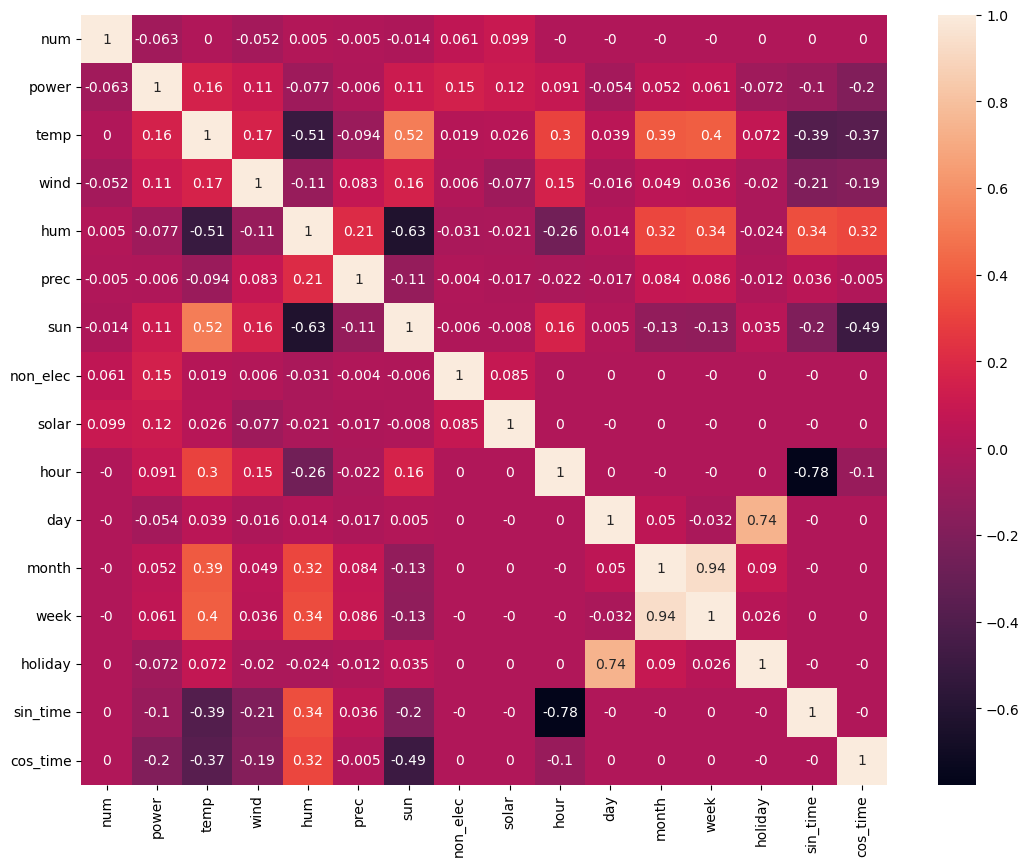

In [127]:
# 히트맵 그리기
plt.figure(figsize=(13, 10))  # 그래프 크기 설정
sns.heatmap(train.corr().round(3), annot=True)

plt.show()

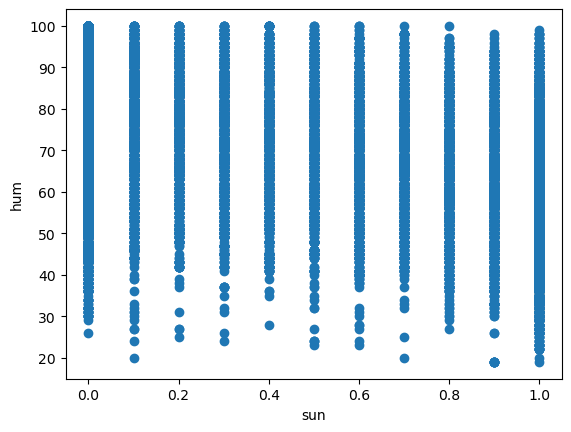

In [138]:
plt.scatter(train['sun'],train['hum'])
# 축 레이블 추가
plt.xlabel('sun')
plt.ylabel('hum')
plt.show()

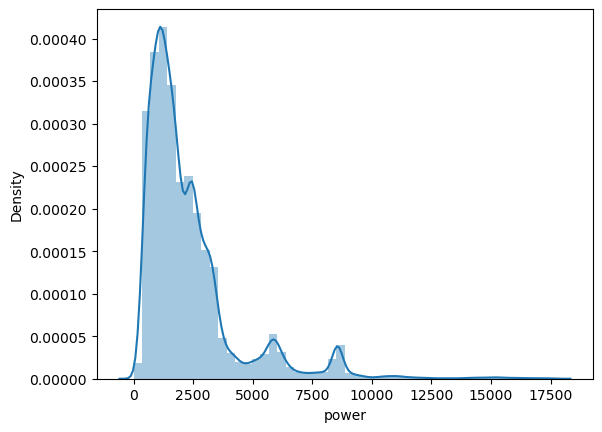

In [141]:
sns.distplot(train['power'])

plt.show()

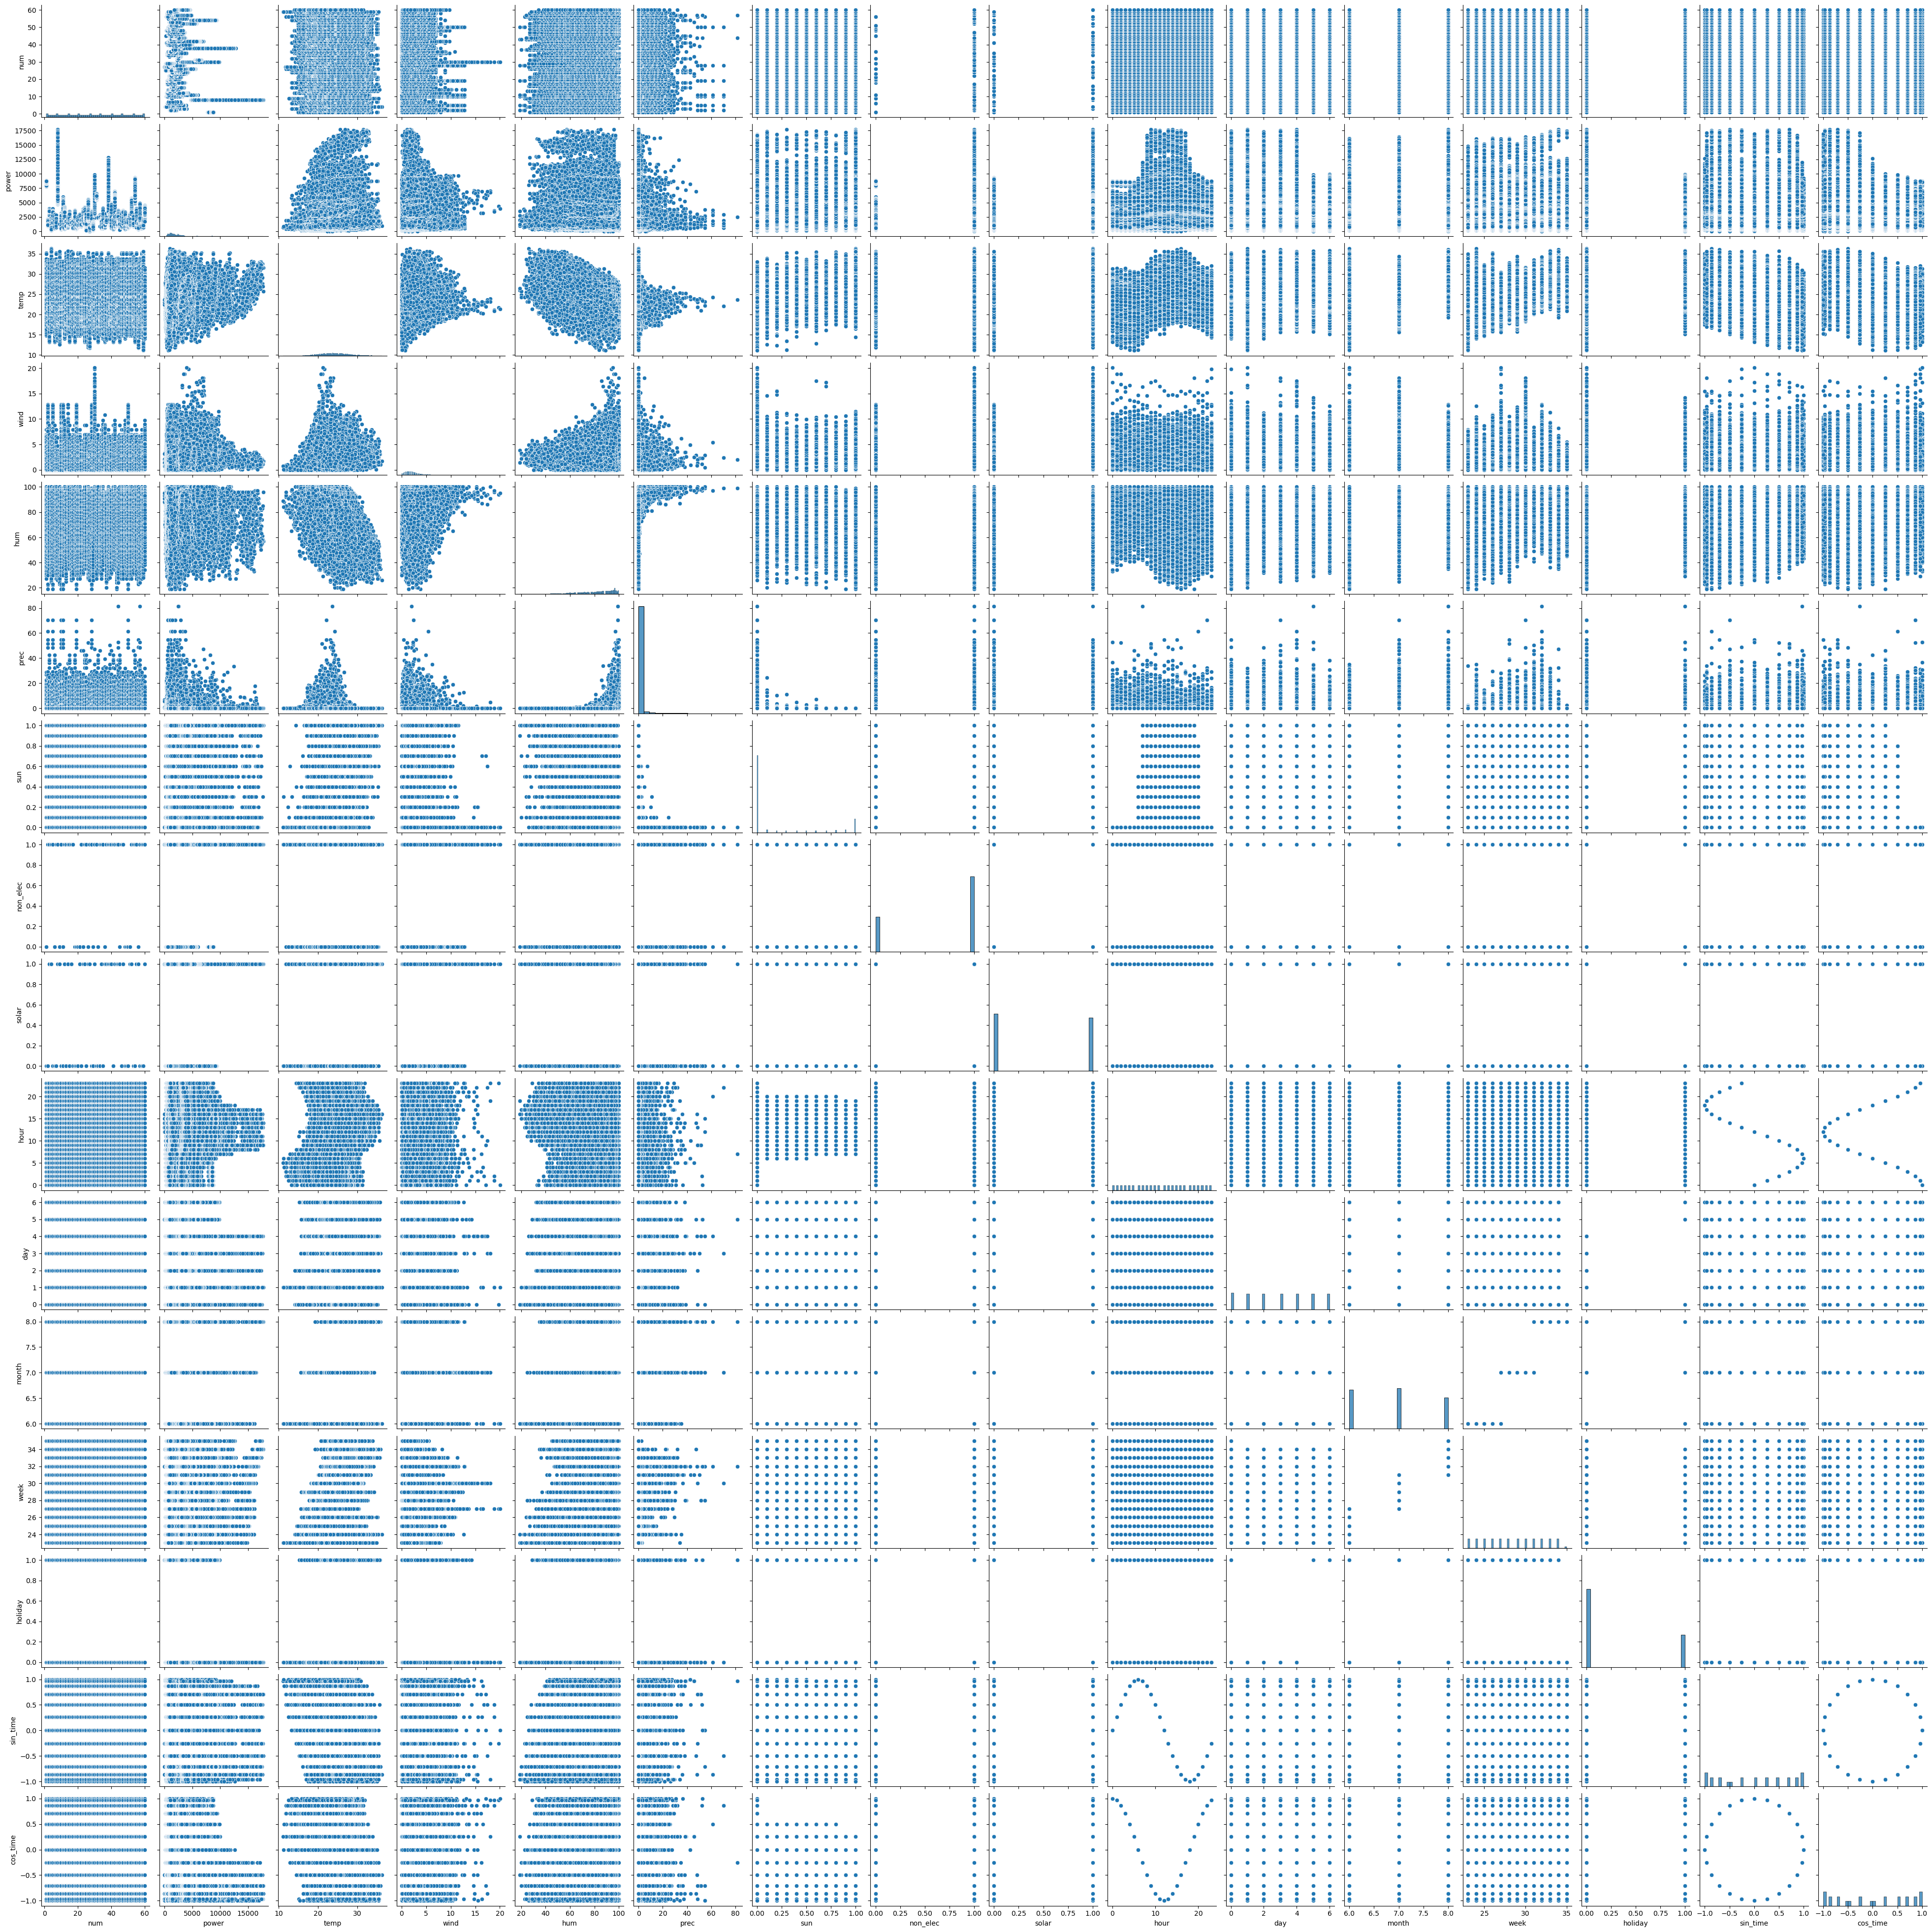

In [144]:
sns.pairplot(train)


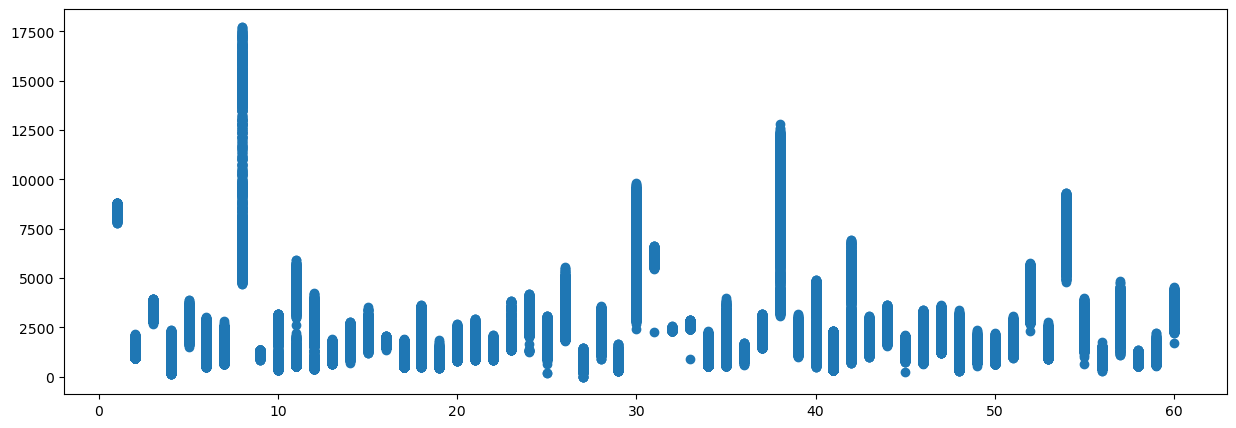

In [150]:
plt.figure(figsize=(15,5))
plt.scatter(train['num'],train['power'])
plt.show()

In [156]:
num_1=train[train['num']==1]
num_1

num      date_time     power  temp  wind   hum  prec  sun  non_elec  \
0       1  2020-06-01 00  8179.056  17.6   2.5  92.0   0.8  0.0       0.0   
1       1  2020-06-01 01  8135.640  17.7   2.9  91.0   0.3  0.0       0.0   
2       1  2020-06-01 02  8107.128  17.5   3.2  91.0   0.0  0.0       0.0   
3       1  2020-06-01 03  8048.808  17.1   3.2  91.0   0.0  0.0       0.0   
4       1  2020-06-01 04  8043.624  17.0   3.3  92.0   0.0  0.0       0.0   
...   ...            ...       ...   ...   ...   ...   ...  ...       ...   
2035    1  2020-08-24 19  8714.952  29.4   3.4  66.0   0.0  0.2       0.0   
2036    1  2020-08-24 20  8740.224  28.7   1.9  69.0   0.0  0.0       0.0   
2037    1  2020-08-24 21  8730.504  28.3   1.1  71.0   0.0  0.0       0.0   
2038    1  2020-08-24 22  8725.968  28.3   2.4  72.0   0.0  0.0       0.0   
2039    1  2020-08-24 23  8705.232  28.1   2.3  73.0   0.0  0.0       0.0   

      solar  hour  day  month  week  holiday  sin_time  cos_time  
0       0.0     0    0      6    23        0  0.000000  1.000000  
1       0.0     1    0      6    23        0  0.258819  0.965926  
2       0.0     2    0      6    23        0  0.500000  0.866025  
3       0.0     3    0      6    23        0  0.707107  0.707107  
4       0.0     4    0      6    23        0  0.866025  0.500000  
...     ...   ...  ...    ...   ...      ...       ...       ...  
2035    0.0    19    0      8    35        0 -0.965926  0.258819  
2036    0.0    20    0      8    35        0 -0.866025  0.500000  
2037    0.0    21    0      8    35        0 -0.707107  0.707107  
2038    0.0    22    0      8    35        0 -0.500000  0.866025  
2039    0.0    23    0      8    35        0 -0.258819  0.965926  

[2040 rows x 17 columns]

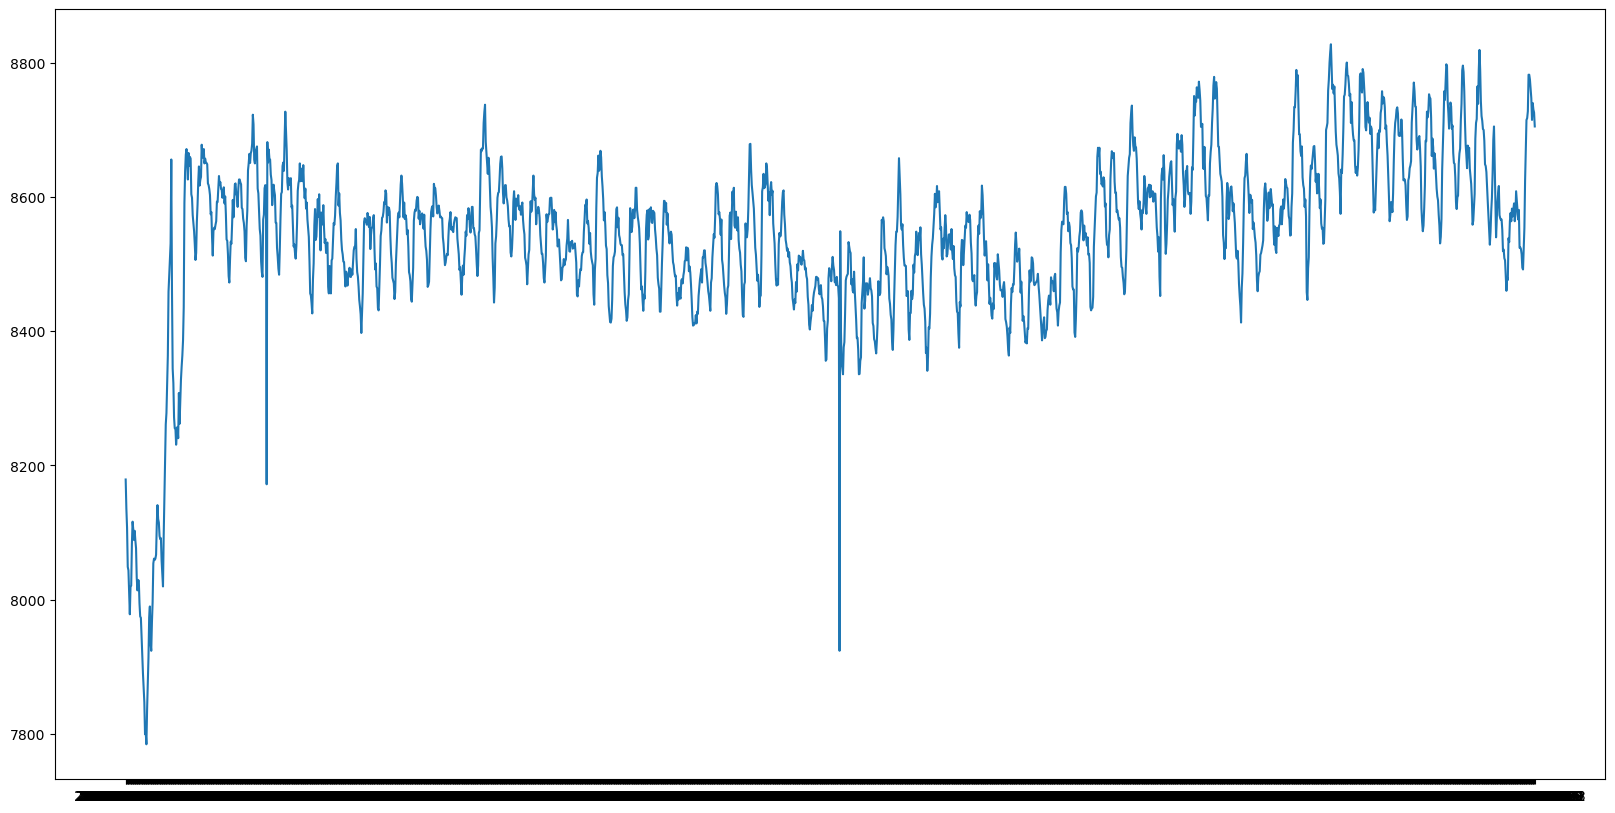

In [180]:
plt.figure(figsize=(20,10))
plt.plot(num_1['date_time'],num_1['power'])
plt.show()

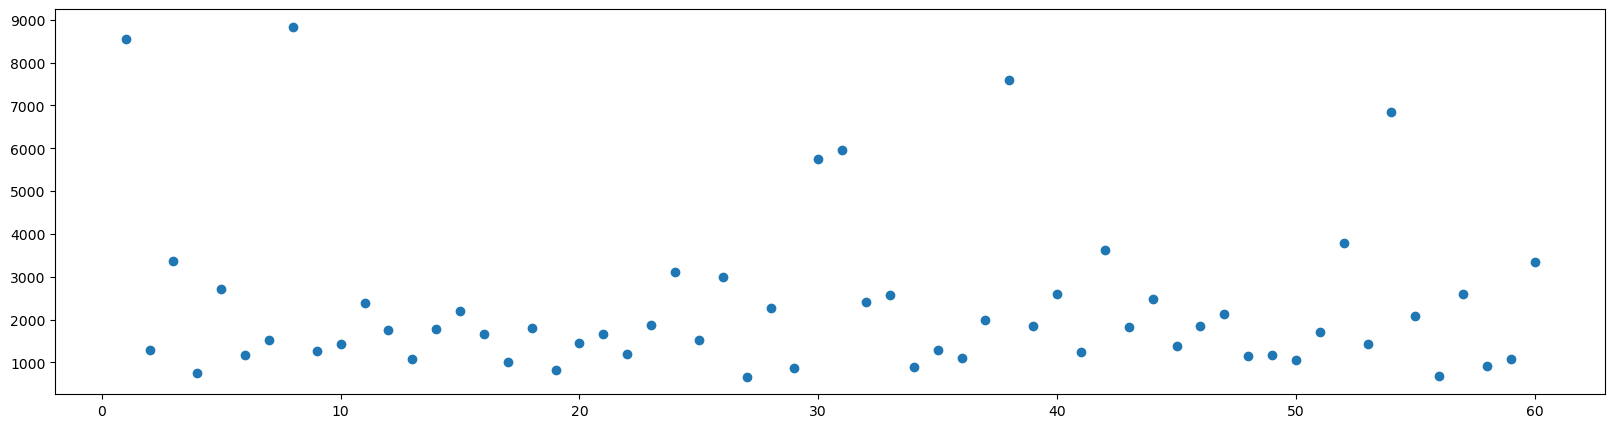

In [215]:
plt.figure(figsize=(20,5))
plt.scatter(n_mean['num'],n_mean['power'])
plt.show()

In [235]:
n_mean=train.groupby('num')['power'].mean().reset_index()
n_mean.head()

num        power
0    1  8543.273488
1    2  1299.914365
2    3  3371.353699
3    4   763.997353
4    5  2714.509694

In [236]:
train.groupby('num')['power'].agg({'mean','max','min'}).reset_index().head()

num         mean        max       min
0    1  8543.273488  8827.7040  7784.424
1    2  1299.914365  2165.2920   935.712
2    3  3371.353699  3957.4575  2675.862
3    4   763.997353  2385.5040   138.240
4    5  2714.509694  3890.1600  1526.256

In [201]:
n_mean.loc[n_mean['power']<=1000]

num       power
3     4  763.997353
18   19  827.193587
26   27  666.142241
28   29  861.074248
33   34  900.586521
55   56  688.120412
57   58  913.814029

In [237]:
n_mean.loc[(n_mean['power'] > 1000) & (n_mean['power'] <= 3000)].head()

num        power
1    2  1299.914365
4    5  2714.509694
5    6  1184.129868
6    7  1527.138356
8    9  1256.884880

In [238]:
n_mean.loc[(n_mean['power'] > 3000) & (n_mean['power'] <= 6000)].head()

num        power
2     3  3371.353699
23   24  3114.640165
29   30  5761.224314
30   31  5964.317576
41   42  3624.592027

In [205]:
n_mean.loc[(n_mean['power'] > 6000) & (n_mean['power'] <= 9000)]

num        power
0     1  8543.273488
7     8  8837.364073
37   38  7588.679824
53   54  6839.836376

In [209]:
train.groupby('num')['power'].mean().reset_index()['power'].max()

8837.36407257647

In [210]:
train.groupby('num')['power'].mean().reset_index()['power'].min()

666.1422407866667

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(num_1['date_time'],num_1['power'])
plt.show()